In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial import polynomial as P
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
def true_fun(X):
    return np.sin(2.0 * np.pi * X)


n_samples = 10

x = np.linspace(0, 1, n_samples)
y = true_fun(x) + np.random.randn(n_samples) * 0.3

  Feature  Coefficient
0       1     0.107539
  Feature  Coefficient
0       x    -0.635889
  Feature  Coefficient
0       x    13.448295
1     x^2   -37.416288
2     x^3    25.064993
  Feature    Coefficient
0       x      76.846531
1     x^2   -1702.338432
2     x^3   16064.672405
3     x^4  -79079.236772
4     x^5  224529.718105
5     x^6 -381952.938283
6     x^7  384054.284845
7     x^8 -210215.560363
8     x^9   48225.634868


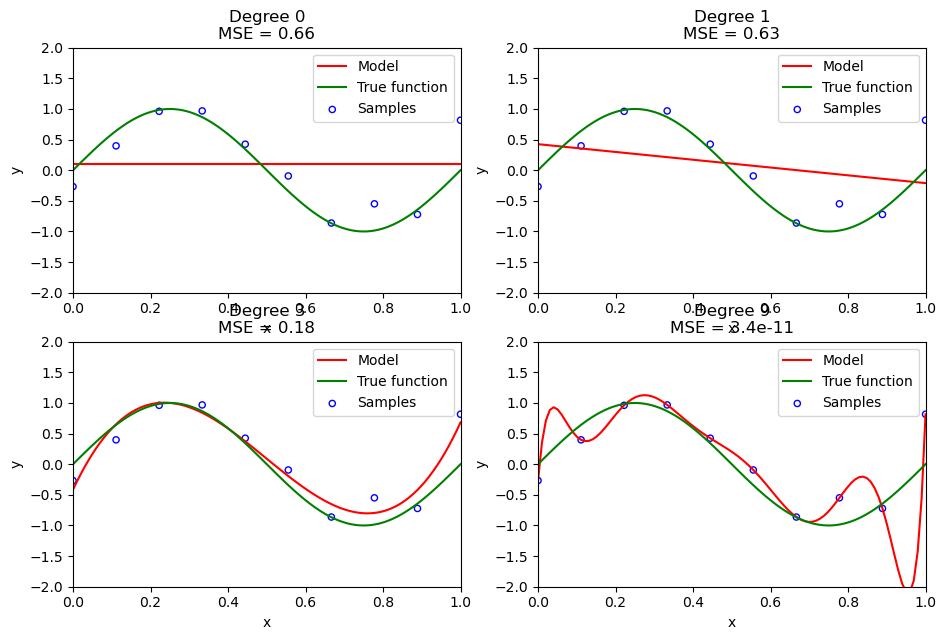

In [42]:
degrees = [0, 1, 3, 9]

plt.figure(figsize=(11, 7))
for i in range(len(degrees)):
    ax = plt.subplot(2, 2, i + 1)

    fit_intercept = True
    include_bias = False

    if degrees[i] == 0:
        fit_intercept = False
        include_bias = True

    polynomial_features = PolynomialFeatures(
        degree=degrees[i], include_bias=include_bias
    )

    linear_regression = LinearRegression(fit_intercept=fit_intercept)
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    x_reshaped = x.reshape(-1, 1)
    pipeline.fit(x_reshaped, y)

    # Access coefficients and intercept
    linear_model = pipeline.named_steps["linear_regression"]
    coefficients = linear_model.coef_
    intercept = linear_model.intercept_

    # Get feature names
    poly = pipeline.named_steps["polynomial_features"]
    feature_names = poly.get_feature_names_out(input_features=["x"])

    # Create DataFrame for visualization
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
    print(coef_df)

    y_pred = pipeline.predict(x_reshaped)

    mse = root_mean_squared_error(y, y_pred)

    x_test = np.linspace(0, 1, 100)
    plt.plot(
        x_test, pipeline.predict(x_test.reshape(-1, 1)), color="red", label="Model"
    )
    plt.plot(x_test, true_fun(x_test), color="green", label="True function")
    plt.scatter(x, y, edgecolor="b", s=20, facecolors="none", label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2}".format(degrees[i], mse))

plt.show()

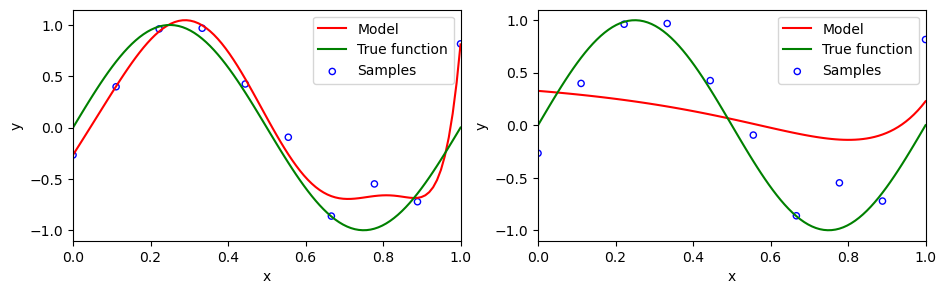

In [62]:
alphas = [np.exp(-18), np.exp(0)]

plt.figure(figsize=(11, 3))
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)

    polynomial_features = PolynomialFeatures(degree=9, include_bias=False)

    ridge = Ridge(alpha=alphas[i])

    # Create and fit the model
    pipeline = make_pipeline(polynomial_features, ridge)

    x_reshaped = x.reshape(-1, 1)

    pipeline.fit(x_reshaped, y)

    y_pred = pipeline.predict(x_reshaped)

    mse = root_mean_squared_error(y, y_pred)

    X_test = np.linspace(0, 1, 100)
    plt.plot(
        X_test, pipeline.predict(X_test[:, np.newaxis]), color="red", label="Model"
    )
    plt.plot(X_test, true_fun(X_test), color="green", label="True function")
    plt.scatter(x, y, edgecolor="b", s=20, facecolors="none", label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.legend(loc="best")
    # plt.title("Degree {}\nMSE = {:.2}".format(degrees[i], mse))
    # plt.title(mse)

plt.show()

In [ ]:
def weights(x, y, deg):
    X = P.polyvander(x=x, deg=deg)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


weights(x, y, 3)

array([ -0.41411572,  13.44829479, -37.41628791,  25.06499264])

In [69]:
P.polyvander(x=x, deg=3)

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568, 0.00137174],
       [1.        , 0.22222222, 0.04938272, 0.01097394],
       [1.        , 0.33333333, 0.11111111, 0.03703704],
       [1.        , 0.44444444, 0.19753086, 0.0877915 ],
       [1.        , 0.55555556, 0.30864198, 0.17146776],
       [1.        , 0.66666667, 0.44444444, 0.2962963 ],
       [1.        , 0.77777778, 0.60493827, 0.47050754],
       [1.        , 0.88888889, 0.79012346, 0.70233196],
       [1.        , 1.        , 1.        , 1.        ]])

In [70]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])